In [1]:
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score,classification_report

Installing datasets, spacy, scispacy, en_ner_bc5cdr_md model , scikit-learn,scipy

In [2]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.

Import load_dataset function from datasets

In [3]:
from datasets import load_dataset


loading tner/bc5cdr dataset (training data)


In [4]:
dataset=load_dataset("tner/bc5cdr") #loading dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/5228 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5330 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5865 [00:00<?, ? examples/s]

converting dataset to pandas dataframe

In [5]:
df=dataset['train'].to_pandas()   #converting dataset to pandas dataframe

In [6]:
df.head()

,tokens,tags
0,"[Naloxone, reverses, the, antihypertensive, ef...","[1, 0, 0, 0, 0, 0, 1, 0]"
1,"[In, unanesthetized, ,, spontaneously, hyperte...","[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[2, to, 2, mg, /, kg, .]","[0, 0, 0, 0, 0, 0, 0]"
3,"[The, hypotensive, effect, of, 100, mg, /, kg,...","[0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]"
4,"[Naloxone, alone, did, not, affect, either, bl...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [7]:
!pip install spacy

In [8]:
!pip install scispacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 kB 26.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 11.9 MB/s eta 0:00:00
  Using cached pybind11-2.6.1-py2.py3-none-any.whl (188 kB)
  Created wheel for nmslib: filename=nmslib-2.1.1-cp310-cp310-linux_x86_64.whl size=13578645 sha256=36eb39777a8378132acdf3f729721e25bf96de337989d81b5cf473198400aa8d
  Stored in directory: /root/.cache/pip/wheels/21/1a/5d/4cc754a5b1a88405cad184b76f823897a63a8d19afcd4b9314
Successfully built nmslib
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4


In [9]:
import scispacy

In [10]:
import spacy

In [11]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_bc5cdr_md-0.5.4.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en-ner-bc5cdr-md: filename=en_ner_bc5cdr_md-0.5.4-py3-none-any.whl size=119787685 sha256=fcc8a03a9ed8f7a23e16837225e78b81df4f7112200817f57fbdc00cca943012
  Stored in directory: /root/.cache/pip/wheels/56/ff/94/8c86b3e1b0ac75480c6f3179eb33bf970c05d0be9ff2230b77
Successfully built en-ner-bc5cdr-md


loading en_ner_bc5cdr_md spacy model

In [12]:

nlp = spacy.load("en_ner_bc5cdr_md")

/usr/local/lib/python3.10/dist-packages/spacy/language.py:2195: FutureWarning: Possible set union at position 6328
  deserializers["tokenizer"] = lambda p: self.tokenizer.from_disk(  # type: ignore[union-attr]


Map Integer Tags to Descriptions in training data:

In [13]:
import pandas as pd

ner = {
    0: 'O',
    1: 'B-CHEMICAL',
    2: 'I-CHEMICAL',
    3: 'B-DISEASE',
    4: 'I-DISEASE'
}


dataset = pd.DataFrame(df)

# Function to map tags to their descriptions
def map_tags_to_descriptions(tags):
    return [ner[tag] for tag in tags]

# Apply the function to the 'Tags' column
dataset['Tag description'] = dataset['tags'].apply(map_tags_to_descriptions)

# Display the result
print(dataset.head())


                                              tokens  \
0  [Naloxone, reverses, the, antihypertensive, ef...   
1  [In, unanesthetized, ,, spontaneously, hyperte...   
2                           [2, to, 2, mg, /, kg, .]   
3  [The, hypotensive, effect, of, 100, mg, /, kg,...   
4  [Naloxone, alone, did, not, affect, either, bl...   

                                                tags  \
0                           [1, 0, 0, 0, 0, 0, 1, 0]   
1  [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2                              [0, 0, 0, 0, 0, 0, 0]   
3   [0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]   
4               [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   

                                     Tag description  
0         [B-CHEMICAL, O, O, O, O, O, B-CHEMICAL, O]  
1  [O, O, O, O, I-CHEMICAL, O, O, O, O, O, O, O, ...  
2                              [O, O, O, O, O, O, O]  
3  [O, I-CHEMICAL, O, O, O, O, O, O, B-CHEMICAL, ...  
4      [B-CHEMICAL, O, O, O, O, O, O, O, O, O, O, O

In [14]:
dataset.head()

,tokens,tags,Tag description
0,"[Naloxone, reverses, the, antihypertensive, ef...","[1, 0, 0, 0, 0, 0, 1, 0]","[B-CHEMICAL, O, O, O, O, O, B-CHEMICAL, O]"
1,"[In, unanesthetized, ,, spontaneously, hyperte...","[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O, O, O, O, I-CHEMICAL, O, O, O, O, O, O, O, ..."
2,"[2, to, 2, mg, /, kg, .]","[0, 0, 0, 0, 0, 0, 0]","[O, O, O, O, O, O, O]"
3,"[The, hypotensive, effect, of, 100, mg, /, kg,...","[0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]","[O, I-CHEMICAL, O, O, O, O, O, O, B-CHEMICAL, ..."
4,"[Naloxone, alone, did, not, affect, either, bl...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[B-CHEMICAL, O, O, O, O, O, O, O, O, O, O, O]"


In [ ]:
!pip install scikit-learn

In [ ]:
!pip install scipy

Preparation of training dataset for the training of the model

In [15]:
import spacy
from spacy.training.example import Example



ner = {
    0: 'O',
    1: 'B-CHEMICAL',
    2: 'I-CHEMICAL',
    3: 'B-DISEASE',
    4: 'I-DISEASE'
}

def convert_to_iob(tags):  # Function to convert integer tags to IOB format
    return [ner[tag] for tag in tags]

# Function to convert tags to spaCy's IOB format
def convert_to_spacy_format(tokens, tags):
    entities = []
    start = None
    entity = None
    for i, tag in enumerate(tags):
        if tag.startswith("B-"):
            if start is not None:
                entities.append((start, i, entity))
            start = i
            entity = tag[2:]
        elif tag.startswith("I-") and start is not None:
            continue
        else:
            if start is not None:
                entities.append((start, i, entity))
                start = None
                entity = None
    if start is not None:
        entities.append((start, len(tags), entity))
    return entities

# Function to remove overlapping entities
def remove_overlapping_entities(entities):
    non_overlapping = []
    last_end = -1
    for start, end, label in sorted(entities, key=lambda x: x[0]):
        if start >= last_end:
            non_overlapping.append((start, end, label))
            last_end = end
    return non_overlapping

# Prepare the training data
train_data = []
for i, row in dataset.iterrows():
    tokens = row['tokens']
    tags = convert_to_iob(row['tags'])  # Convert integer tags to IOB format
    entities = convert_to_spacy_format(tokens, tags)
    text = " ".join(tokens)

    entity_offsets = []
    for start, end, label in entities:
        entity_text = " ".join(tokens[start:end])
        start_position = text.index(entity_text)
        end_position = start_position + len(entity_text)
        entity_offsets.append((start_position, end_position, label))

    # Use Doc.char_span to ensure alignment and remove overlapping entities
    doc = nlp.make_doc(text)
    ents = []
    for start, end, label in entity_offsets:
        span = doc.char_span(start, end, label=label)
        if span is not None:
            ents.append((start, end, label))

    # Remove overlapping entities
    unique_ents = remove_overlapping_entities(ents)
    train_data.append((text, {"entities": unique_ents}))

# Display the prepared training data
print(train_data[:3])

[('Naloxone reverses the antihypertensive effect of clonidine .', {'entities': [(0, 8, 'CHEMICAL'), (49, 58, 'CHEMICAL')]}), ('In unanesthetized , spontaneously hypertensive rats the decrease in blood pressure and heart rate produced by intravenous clonidine , 5 to 20 micrograms / kg , was inhibited or reversed by nalozone , 0 .', {'entities': [(122, 131, 'CHEMICAL'), (189, 197, 'CHEMICAL')]}), ('2 to 2 mg / kg .', {'entities': []})]


training of model for epoch 3

In [16]:
optimizer = nlp.resume_training()




Iteration 0: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 5260.001224625408}
Iteration 1: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 4584.488812052956}
Iteration 2: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 4398.1944166722715}


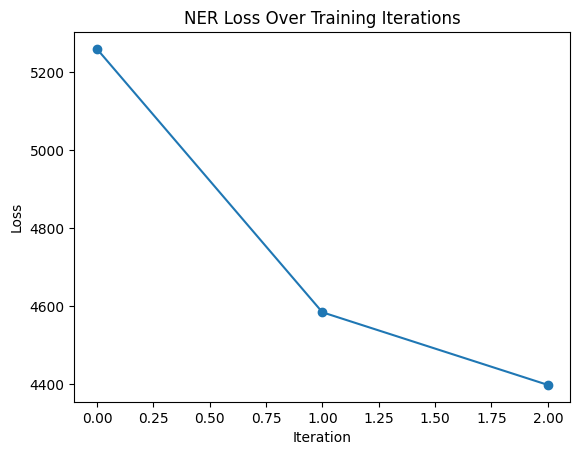

In [17]:
# ####MODEL IS TRAINED FOR EPOCH 3

# n_iter = 3 # Number of training iterations
# losses_history = []

# # Perform training
# for i in range(n_iter):
#     losses = {}
#     for text, annotations in train_data:
#         doc = nlp.make_doc(text)
#         example = Example.from_dict(doc, annotations)
#         try:
#             nlp.update([example], drop=0.5, sgd=optimizer, losses=losses)
#         except ValueError as e:
#             print(f"Error processing {text}: {e}")
#     print(f"Iteration {i}: Losses - {losses}")
#     losses_history.append(losses['ner'])

# # Plotting the loss history
# import matplotlib.pyplot as plt

# plt.plot(range(n_iter), losses_history, marker='o')
# plt.title('NER Loss Over Training Iterations')
# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.show()


In [19]:
# output_dir = "/content/drive/MyDrive/trained_model_spacy_3"
# nlp.to_disk(output_dir)
# print(f"Saved model to {output_dir}")


Saved model to /content/drive/MyDrive/trained_model_spacy_3


In [20]:
output_dir = "/content/drive/MyDrive/trained_model_spacy_3"
load_spacy_3=spacy.load(output_dir)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


training of model on epoch 10

Iteration 0: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 4605.59033502719}
Iteration 1: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 4226.895246480023}
Iteration 2: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 4039.1094509243085}
Iteration 3: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 3835.072178476255}
Iteration 4: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 3677.048507392273}
Iteration 5: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 3539.614451691883}
Iteration 6: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 3555.918774051875}
Iteration 7: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 3443.970537801063}
Iteration 8: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 3501.5034002188695}
Iteration 9: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 3490.0242086865837}


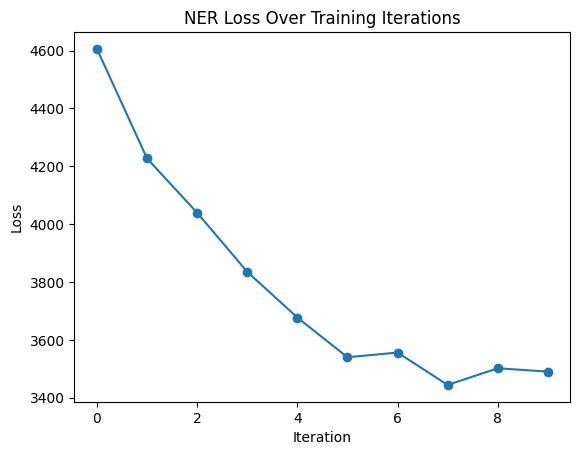

In [ ]:
# ####MODEL IS TRAINED FOR EPOCH 10

# n_iter = 10  # Number of training iterations
# losses_history = []

# # Perform training
# for i in range(n_iter):
#     losses = {}
#     for text, annotations in train_data:
#         doc = nlp.make_doc(text)
#         example = Example.from_dict(doc, annotations)
#         try:
#             nlp.update([example], drop=0.5, sgd=optimizer, losses=losses)
#         except ValueError as e:
#             print(f"Error processing {text}: {e}")
#     print(f"Iteration {i}: Losses - {losses}")
#     losses_history.append(losses['ner'])

# # Plotting the loss history
# import matplotlib.pyplot as plt

# plt.plot(range(n_iter), losses_history, marker='o')
# plt.title('NER Loss Over Training Iterations')
# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.show()


saving the trained model

In [ ]:
# output_dir = "/content/drive/MyDrive/trained_model"
# nlp.to_disk(output_dir)
# print(f"Saved model to {output_dir}")


Saved model to /content/drive/MyDrive/trained_model


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


loading trained model of epoch 10 into trained model instance

In [ ]:
output_dir = "/content/drive/MyDrive/trained_model"
trained_model = spacy.load(output_dir)
print(f"Loaded model from {output_dir}")

Loaded model from /content/drive/MyDrive/trained_model


training of model for epoch 25

Iteration 0: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 5115.215301673668}
Iteration 1: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 4588.017663225909}
Iteration 2: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 4310.084848139809}
Iteration 3: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 3988.68398208267}
Iteration 4: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 3924.3341435793172}
Iteration 5: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 3689.8543807600104}
Iteration 6: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 3694.2747065659623}
Iteration 7: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 3571.2742005610094}
Iteration 8: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 3485.9502303307745}
Iteration 9: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 3618.292523263569}
Iteration 10: Losses - {'tok2vec': 0.0, 'tagge

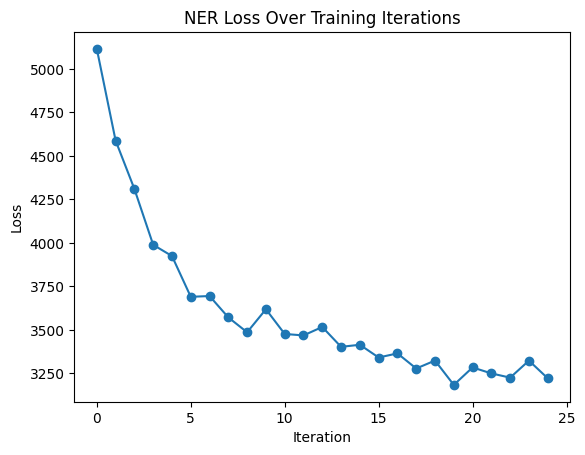

In [ ]:
# optimizer = nlp.resume_training()
# n_iter = 25 # Number of training iterations
# losses_history = []

# # Perform training
# for i in range(n_iter):
#     losses = {}
#     for text, annotations in train_data:
#         doc = nlp.make_doc(text)
#         example = Example.from_dict(doc, annotations)
#         try:
#             nlp.update([example], drop=0.5, sgd=optimizer, losses=losses)
#         except ValueError as e:
#             print(f"Error processing {text}: {e}")
#     print(f"Iteration {i}: Losses - {losses}")
#     losses_history.append(losses['ner'])

# # Plotting the loss history
# import matplotlib.pyplot as plt

# plt.plot(range(n_iter), losses_history, marker='o')
# plt.title('NER Loss Over Training Iterations')
# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.show()


saving the model

In [ ]:
# output_dir = "/content/drive/MyDrive/trained_model_after25"
# nlp.to_disk(output_dir)
# print(f"Saved model to {output_dir}")


Saved model to /content/drive/MyDrive/trained_model_after25


loading trained model of epochs 25 in trained_model_25 instance

In [ ]:
out_dir= "/content/drive/MyDrive/trained_model_after25"
trained_model_25 = spacy.load(out_dir)
print(f"Loaded model from {output_dir}")

Loaded model from /content/drive/MyDrive/trained_model


loading validation dataset

In [21]:
data=load_dataset("tner/bc5cdr") #loading dataset
dfv=data['validation'].to_pandas() #loading validation dataset

In [22]:
dfv.head()

,tokens,tags
0,"[Tricuspid, valve, regurgitation, and, lithium...","[2, 3, 3, 0, 1, 4, 2, 0, 0, 0, 0, 0]"
1,"[A, newborn, with, massive, tricuspid, regurgi...","[0, 0, 0, 0, 2, 3, 0, 2, 3, 0, 2, 3, 3, 0, 0, ..."
2,"[This, is, the, first, patient, to, initially,...","[0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 2, 3, 0, 0, ..."
3,"[Sixty, -, three, percent, of, these, infants,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,"[Lithium, carbonate, may, be, a, factor, in, t...","[1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3, 0, ..."


map integer tag to the description in validation dataset

In [23]:
import pandas as pd

ner = {
    0: 'O',
    1: 'B-CHEMICAL',
    2: 'I-CHEMICAL',
    3: 'B-DISEASE',
    4: 'I-DISEASE'
}


data = pd.DataFrame(dfv)

# Function to map tags to their descriptions
def map_tags_to_descriptions(tags):
    return [ner[tag] for tag in tags]

# Apply the function to the 'Tags' column
data['Tag description'] = data['tags'].apply(map_tags_to_descriptions)

# Display the result
print(data.head())


                                              tokens  \
0  [Tricuspid, valve, regurgitation, and, lithium...   
1  [A, newborn, with, massive, tricuspid, regurgi...   
2  [This, is, the, first, patient, to, initially,...   
3  [Sixty, -, three, percent, of, these, infants,...   
4  [Lithium, carbonate, may, be, a, factor, in, t...   

                                                tags  \
0               [2, 3, 3, 0, 1, 4, 2, 0, 0, 0, 0, 0]   
1  [0, 0, 0, 0, 2, 3, 0, 2, 3, 0, 2, 3, 3, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 2, 3, 0, 0, ...   
3               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   
4  [1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3, 0, ...   

                                     Tag description  
0  [I-CHEMICAL, B-DISEASE, B-DISEASE, O, B-CHEMIC...  
1  [O, O, O, O, I-CHEMICAL, B-DISEASE, O, I-CHEMI...  
2  [O, O, O, O, O, O, O, O, I-CHEMICAL, B-DISEASE...  
3               [O, O, O, O, O, O, O, O, O, O, O, O]  
4  [B-CHEMICAL, I-DISEASE, O, O, O, O, O, O, O, O..

In [24]:
data.head()

,tokens,tags,Tag description
0,"[Tricuspid, valve, regurgitation, and, lithium...","[2, 3, 3, 0, 1, 4, 2, 0, 0, 0, 0, 0]","[I-CHEMICAL, B-DISEASE, B-DISEASE, O, B-CHEMIC..."
1,"[A, newborn, with, massive, tricuspid, regurgi...","[0, 0, 0, 0, 2, 3, 0, 2, 3, 0, 2, 3, 3, 0, 0, ...","[O, O, O, O, I-CHEMICAL, B-DISEASE, O, I-CHEMI..."
2,"[This, is, the, first, patient, to, initially,...","[0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 2, 3, 0, 0, ...","[O, O, O, O, O, O, O, O, I-CHEMICAL, B-DISEASE..."
3,"[Sixty, -, three, percent, of, these, infants,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[O, O, O, O, O, O, O, O, O, O, O, O]"
4,"[Lithium, carbonate, may, be, a, factor, in, t...","[1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3, 0, ...","[B-CHEMICAL, I-DISEASE, O, O, O, O, O, O, O, O..."


evaluation of trained model on validation dataset epoch 3

In [25]:

# Initialize lists to collect true and predicted tags
true_entities = []
predicted_entities = []

# Process each row in the DataFrame
for index, row in data.iterrows():
    tokens = row['tokens']
    true_tags = row['Tag description']
    text = " ".join(tokens)

    # Perform NER prediction with spaCy model
    doc = load_spacy_3(text)

    # Extract predicted tags from spaCy entities
    predicted_tags = ['O'] * len(tokens)
    for ent in doc.ents:
        start_token = len(text[:ent.start_char].split())
        end_token = len(text[:ent.end_char].split())
        predicted_tags[start_token] = f"B-{ent.label_}"
        for i in range(start_token + 1, end_token):
            predicted_tags[i] = f"I-{ent.label_}"

    # Extend true and predicted tags for metric calculation
    true_entities.extend(true_tags)
    predicted_entities.extend(predicted_tags)

# Ensure both lists have the same length
min_length = min(len(true_entities), len(predicted_entities))
true_entities = true_entities[:min_length]
predicted_entities = predicted_entities[:min_length]

# Calculate metrics
accuracy=accuracy_score(true_entities, predicted_entities)
precision = precision_score(true_entities, predicted_entities, average='weighted', zero_division=0)
recall = recall_score(true_entities, predicted_entities, average='weighted', zero_division=0)
f1 = f1_score(true_entities, predicted_entities, average='weighted', zero_division=0)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9375
Precision: 0.9052
Recall: 0.9375
F1 Score: 0.9181


Evaluation on validation dataset using the trained model on epochs 10

In [ ]:

# Initialize lists to collect true and predicted tags
true_entities = []
predicted_entities = []

# Process each row in the DataFrame
for index, row in data.iterrows():
    tokens = row['tokens']
    true_tags = row['Tag description']
    text = " ".join(tokens)

    # Perform NER prediction with spaCy model
    doc = trained_model(text)

    # Extract predicted tags from spaCy entities
    predicted_tags = ['O'] * len(tokens)
    for ent in doc.ents:
        start_token = len(text[:ent.start_char].split())
        end_token = len(text[:ent.end_char].split())
        predicted_tags[start_token] = f"B-{ent.label_}"
        for i in range(start_token + 1, end_token):
            predicted_tags[i] = f"I-{ent.label_}"

    # Extend true and predicted tags for metric calculation
    true_entities.extend(true_tags)
    predicted_entities.extend(predicted_tags)

# Ensure both lists have the same length
min_length = min(len(true_entities), len(predicted_entities))
true_entities = true_entities[:min_length]
predicted_entities = predicted_entities[:min_length]

# Calculate metrics
accuracy=accuracy_score(true_entities, predicted_entities)
precision = precision_score(true_entities, predicted_entities, average='weighted', zero_division=0)
recall = recall_score(true_entities, predicted_entities, average='weighted', zero_division=0)
f1 = f1_score(true_entities, predicted_entities, average='weighted', zero_division=0)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9182
Precision: 0.9199
Recall: 0.9182
F1 Score: 0.9177


In [ ]:
report=classification_report(true_entities, predicted_entities)
print("Classification report: \n",report)


Classification report: 
               precision    recall  f1-score   support

  B-CHEMICAL       0.93      0.90      0.91      5347
   B-DISEASE       0.04      0.07      0.05      2416
  I-CHEMICAL       0.11      0.02      0.03      4244
   I-DISEASE       0.00      0.00      0.00       538
           O       0.98      0.99      0.98     96413

    accuracy                           0.92    108958
   macro avg       0.41      0.39      0.40    108958
weighted avg       0.92      0.92      0.92    108958



Evaluation on validation dataset using the trained model on epochs 25

In [ ]:

# Initialize lists to collect true and predicted tags
true_entities = []
predicted_entities = []

# Process each row in the DataFrame
for index, row in data.iterrows():
    tokens = row['tokens']
    true_tags = row['Tag description']
    text = " ".join(tokens)

    # Perform NER prediction with spaCy model
    doc =trained_model_25(text)

    # Extract predicted tags from spaCy entities
    predicted_tags = ['O'] * len(tokens)
    for ent in doc.ents:
        start_token = len(text[:ent.start_char].split())
        end_token = len(text[:ent.end_char].split())
        predicted_tags[start_token] = f"B-{ent.label_}"
        for i in range(start_token + 1, end_token):
            predicted_tags[i] = f"I-{ent.label_}"

    # Extend true and predicted tags for metric calculation
    true_entities.extend(true_tags)
    predicted_entities.extend(predicted_tags)

# Ensure both lists have the same length
min_length = min(len(true_entities), len(predicted_entities))
true_entities = true_entities[:min_length]
predicted_entities = predicted_entities[:min_length]

# Calculate metrics
accuracy=accuracy_score(true_entities, predicted_entities)
precision = precision_score(true_entities, predicted_entities, average='weighted', zero_division=0)
recall = recall_score(true_entities, predicted_entities, average='weighted', zero_division=0)
f1 = f1_score(true_entities, predicted_entities, average='weighted', zero_division=0)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9267
Precision: 0.8938
Recall: 0.9267
F1 Score: 0.9055


In [ ]:
report=classification_report(true_entities, predicted_entities)
print("Classification report: \n",report)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report: 
               precision    recall  f1-score   support

  B-CHEMICAL       0.96      0.62      0.75      5347
   B-DISEASE       0.81      0.64      0.71      2416
  I-CHEMICAL       0.13      0.01      0.02      4244
   I-DISEASE       0.00      0.00      0.00       538
           O       0.93      1.00      0.96     96413

    accuracy                           0.93    108958
   macro avg       0.57      0.45      0.49    108958
weighted avg       0.89      0.93      0.91    108958



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loading test data

In [26]:
datat=load_dataset("tner/bc5cdr") #loading dataset
dft=datat['test'].to_pandas() #loading test dataset

In [27]:
dft.head()

,tokens,tags
0,"[Famotidine, -, associated, delirium, .]","[1, 0, 0, 2, 0]"
1,"[A, series, of, six, cases, .]","[0, 0, 0, 0, 0, 0]"
2,"[Famotidine, is, a, histamine, H2, -, receptor...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[Although, all, of, the, currently, available,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[The, authors, report, on, six, cases, of, fam...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, ..."


map integer tag to description in test data


In [28]:
import pandas as pd

ner = {
    0: 'O',
    1: 'B-CHEMICAL',
    2: 'I-CHEMICAL',
    3: 'B-DISEASE',
    4: 'I-DISEASE'
}


datatest = pd.DataFrame(dft)

# Function to map tags to their descriptions
def map_tags_to_descriptions(tags):
    return [ner[tag] for tag in tags]

# Apply the function to the 'Tags' column
datatest['Tag description'] = datatest['tags'].apply(map_tags_to_descriptions)

# Display the result
print(datatest.head())


                                              tokens  \
0           [Famotidine, -, associated, delirium, .]   
1                     [A, series, of, six, cases, .]   
2  [Famotidine, is, a, histamine, H2, -, receptor...   
3  [Although, all, of, the, currently, available,...   
4  [The, authors, report, on, six, cases, of, fam...   

                                                tags  \
0                                    [1, 0, 0, 2, 0]   
1                                 [0, 0, 0, 0, 0, 0]   
2  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, ...   

                                     Tag description  
0                  [B-CHEMICAL, O, O, I-CHEMICAL, O]  
1                                 [O, O, O, O, O, O]  
2  [B-CHEMICAL, O, O, O, O, O, O, O, O, O, O, O, ...  
3  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...  
4  [O, O, O, O, O, O, O, B-CHEMICAL, O, O, I-CHEM..

In [29]:
datatest.head()

,tokens,tags,Tag description
0,"[Famotidine, -, associated, delirium, .]","[1, 0, 0, 2, 0]","[B-CHEMICAL, O, O, I-CHEMICAL, O]"
1,"[A, series, of, six, cases, .]","[0, 0, 0, 0, 0, 0]","[O, O, O, O, O, O]"
2,"[Famotidine, is, a, histamine, H2, -, receptor...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[B-CHEMICAL, O, O, O, O, O, O, O, O, O, O, O, ..."
3,"[Although, all, of, the, currently, available,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
4,"[The, authors, report, on, six, cases, of, fam...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, ...","[O, O, O, O, O, O, O, B-CHEMICAL, O, O, I-CHEM..."


evaluation of model on test data epoch 3

In [30]:

# Initialize lists to collect true and predicted tags
true_entities = []
predicted_entities = []

# Process each row in the DataFrame
for index, row in datatest.iterrows():
    tokens = row['tokens']
    true_tags = row['Tag description']
    text = " ".join(tokens)

    # Perform NER prediction with spaCy model
    doc = load_spacy_3(text)

    # Extract predicted tags from spaCy entities
    predicted_tags = ['O'] * len(tokens)
    for ent in doc.ents:
        start_token = len(text[:ent.start_char].split())
        end_token = len(text[:ent.end_char].split())
         # Ensure indices are within the bounds
        if start_token < len(predicted_tags):
            predicted_tags[start_token] = f"B-{ent.label_}"
            for i in range(start_token + 1, end_token):
                if i < len(predicted_tags):
                    predicted_tags[i] = f"I-{ent.label_}"

    # Extend true and predicted tags for metric calculation
    true_entities.extend(true_tags)
    predicted_entities.extend(predicted_tags)

# Ensure both lists have the same length
min_length = min(len(true_entities), len(predicted_entities))
true_entities = true_entities[:min_length]
predicted_entities = predicted_entities[:min_length]

# Calculate metrics
accuracy=accuracy_score(true_entities, predicted_entities)
precision = precision_score(true_entities, predicted_entities, average='weighted', zero_division=0)
recall = recall_score(true_entities, predicted_entities, average='weighted', zero_division=0)
f1 = f1_score(true_entities, predicted_entities, average='weighted', zero_division=0)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9414
Precision: 0.9115
Recall: 0.9414
F1 Score: 0.9227


Evaluation on test data using trained model on epochs 10

In [ ]:

# Initialize lists to collect true and predicted tags
true_entities = []
predicted_entities = []

# Process each row in the DataFrame
for index, row in datatest.iterrows():
    tokens = row['tokens']
    true_tags = row['Tag description']
    text = " ".join(tokens)

    # Perform NER prediction with spaCy model
    doc = trained_model(text)

    # Extract predicted tags from spaCy entities
    predicted_tags = ['O'] * len(tokens)
    for ent in doc.ents:
        start_token = len(text[:ent.start_char].split())
        end_token = len(text[:ent.end_char].split())
         # Ensure indices are within the bounds
        if start_token < len(predicted_tags):
            predicted_tags[start_token] = f"B-{ent.label_}"
            for i in range(start_token + 1, end_token):
                if i < len(predicted_tags):
                    predicted_tags[i] = f"I-{ent.label_}"

    # Extend true and predicted tags for metric calculation
    true_entities.extend(true_tags)
    predicted_entities.extend(predicted_tags)

# Ensure both lists have the same length
min_length = min(len(true_entities), len(predicted_entities))
true_entities = true_entities[:min_length]
predicted_entities = predicted_entities[:min_length]

# Calculate metrics
accuracy=accuracy_score(true_entities, predicted_entities)
precision = precision_score(true_entities, predicted_entities, average='weighted', zero_division=0)
recall = recall_score(true_entities, predicted_entities, average='weighted', zero_division=0)
f1 = f1_score(true_entities, predicted_entities, average='weighted', zero_division=0)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9219
Precision: 0.9257
Recall: 0.9219
F1 Score: 0.9220


In [ ]:
report=classification_report(true_entities, predicted_entities)
print("Classification report: \n",report)


Classification report: 
               precision    recall  f1-score   support

  B-CHEMICAL       0.93      0.89      0.91      5385
   B-DISEASE       0.04      0.07      0.05      2424
  I-CHEMICAL       0.13      0.02      0.03      4424
   I-DISEASE       0.00      0.00      0.00       401
           O       0.98      0.99      0.98    103684

    accuracy                           0.92    116318
   macro avg       0.42      0.39      0.40    116318
weighted avg       0.93      0.92      0.92    116318



Evaluation on test data using trained model on epochs 25

In [ ]:

# Initialize lists to collect true and predicted tags
true_entities = []
predicted_entities = []

# Process each row in the DataFrame
for index, row in datatest.iterrows():
    tokens = row['tokens']
    true_tags = row['Tag description']
    text = " ".join(tokens)

    # Perform NER prediction with spaCy model
    doc = trained_model_25(text)

    # Extract predicted tags from spaCy entities
    predicted_tags = ['O'] * len(tokens)
    for ent in doc.ents:
        start_token = len(text[:ent.start_char].split())
        end_token = len(text[:ent.end_char].split())
          # Ensure indices are within the bounds
        if start_token < len(predicted_tags):
            predicted_tags[start_token] = f"B-{ent.label_}"
            for i in range(start_token + 1, end_token):
                if i < len(predicted_tags):
                    predicted_tags[i] = f"I-{ent.label_}"

    # Extend true and predicted tags for metric calculation
    true_entities.extend(true_tags)
    predicted_entities.extend(predicted_tags)

# Ensure both lists have the same length
min_length = min(len(true_entities), len(predicted_entities))
true_entities = true_entities[:min_length]
predicted_entities = predicted_entities[:min_length]

# Calculate metrics
accuracy=accuracy_score(true_entities, predicted_entities)
precision = precision_score(true_entities, predicted_entities, average='weighted', zero_division=0)
recall = recall_score(true_entities, predicted_entities, average='weighted', zero_division=0)
f1 = f1_score(true_entities, predicted_entities, average='weighted', zero_division=0)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9306
Precision: 0.9001
Recall: 0.9306
F1 Score: 0.9101


In [ ]:
report=classification_report(true_entities, predicted_entities)
print("Classification report: \n",report)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report: 
               precision    recall  f1-score   support

  B-CHEMICAL       0.96      0.61      0.75      5385
   B-DISEASE       0.78      0.65      0.71      2424
  I-CHEMICAL       0.16      0.01      0.02      4424
   I-DISEASE       0.00      0.00      0.00       401
           O       0.93      1.00      0.96    103684

    accuracy                           0.93    116318
   macro avg       0.57      0.46      0.49    116318
weighted avg       0.90      0.93      0.91    116318



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


training of model on epoch 15

Iteration 0: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 5128.700120406017}
Iteration 1: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 4667.90363386798}
Iteration 2: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 4182.159321359698}
Iteration 3: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 4090.4837108144357}
Iteration 4: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 3862.311486749122}
Iteration 5: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 3714.6902804395722}
Iteration 6: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 3678.387459913022}
Iteration 7: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 3479.938450878737}
Iteration 8: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 3508.0568266442438}
Iteration 9: Losses - {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 3616.6277208281936}
Iteration 10: Losses - {'tok2vec': 0.0, 'tagger

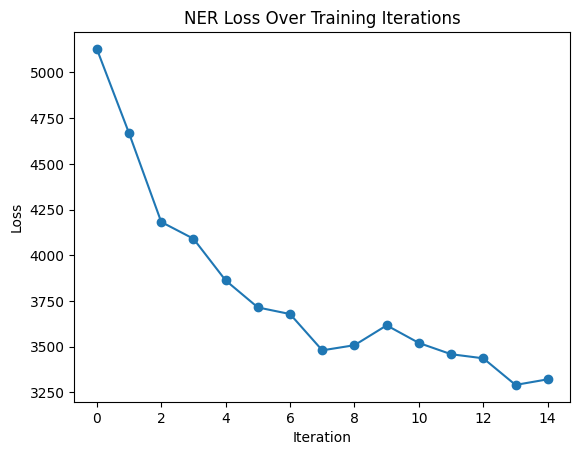

In [ ]:
# optimizer = nlp.resume_training()
# n_iter = 15 # Number of training iterations
# losses_history = []

# # Perform training
# for i in range(n_iter):
#     losses = {}
#     for text, annotations in train_data:
#         doc = nlp.make_doc(text)
#         example = Example.from_dict(doc, annotations)
#         try:
#             nlp.update([example], drop=0.5, sgd=optimizer, losses=losses)
#         except ValueError as e:
#             print(f"Error processing {text}: {e}")
#     print(f"Iteration {i}: Losses - {losses}")
#     losses_history.append(losses['ner'])

# # Plotting the loss history
# import matplotlib.pyplot as plt

# plt.plot(range(n_iter), losses_history, marker='o')
# plt.title('NER Loss Over Training Iterations')
# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.show()


saveing the model

In [ ]:
# output_dir = "/content/drive/MyDrive/trained_model_15"
# nlp.to_disk(output_dir)
# print(f"Saved model to {output_dir}")


Saved model to /content/drive/MyDrive/trained_model_15


load the trained model of epoch 15 in trained_model_15 instance

In [ ]:
output_dir = "/content/drive/MyDrive/trained_model_15"
trained_model_15 = spacy.load(output_dir)
print(f"Loaded model from {output_dir}")

Loaded model from /content/drive/MyDrive/trained_model_15


evaluation of model with validation data (epoch 15)

In [ ]:

# Initialize lists to collect true and predicted tags
true_entities = []
predicted_entities = []

# Process each row in the DataFrame
for index, row in data.iterrows():
    tokens = row['tokens']
    true_tags = row['Tag description']
    text = " ".join(tokens)

    # Perform NER prediction with spaCy model
    doc = trained_model_15(text)

    # Extract predicted tags from spaCy entities
    predicted_tags = ['O'] * len(tokens)
    for ent in doc.ents:
        start_token = len(text[:ent.start_char].split())
        end_token = len(text[:ent.end_char].split())
        predicted_tags[start_token] = f"B-{ent.label_}"
        for i in range(start_token + 1, end_token):
            predicted_tags[i] = f"I-{ent.label_}"

    # Extend true and predicted tags for metric calculation
    true_entities.extend(true_tags)
    predicted_entities.extend(predicted_tags)

# Ensure both lists have the same length
min_length = min(len(true_entities), len(predicted_entities))
true_entities = true_entities[:min_length]
predicted_entities = predicted_entities[:min_length]

# Calculate metrics
accuracy=accuracy_score(true_entities, predicted_entities)
precision = precision_score(true_entities, predicted_entities, average='weighted', zero_division=0)
recall = recall_score(true_entities, predicted_entities, average='weighted', zero_division=0)
f1 = f1_score(true_entities, predicted_entities, average='weighted', zero_division=0)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9341
Precision: 0.9004
Recall: 0.9341
F1 Score: 0.9141


evaluation of model with test data (epoch 15)

In [ ]:

# Initialize lists to collect true and predicted tags
true_entities = []
predicted_entities = []

# Process each row in the DataFrame
for index, row in datatest.iterrows():
    tokens = row['tokens']
    true_tags = row['Tag description']
    text = " ".join(tokens)

    # Perform NER prediction with spaCy model
    doc = trained_model_15(text)

    # Extract predicted tags from spaCy entities
    predicted_tags = ['O'] * len(tokens)
    for ent in doc.ents:
        start_token = len(text[:ent.start_char].split())
        end_token = len(text[:ent.end_char].split())
          # Ensure indices are within the bounds
        if start_token < len(predicted_tags):
            predicted_tags[start_token] = f"B-{ent.label_}"
            for i in range(start_token + 1, end_token):
                if i < len(predicted_tags):
                    predicted_tags[i] = f"I-{ent.label_}"

    # Extend true and predicted tags for metric calculation
    true_entities.extend(true_tags)
    predicted_entities.extend(predicted_tags)

# Ensure both lists have the same length
min_length = min(len(true_entities), len(predicted_entities))
true_entities = true_entities[:min_length]
predicted_entities = predicted_entities[:min_length]

# Calculate metrics
accuracy=accuracy_score(true_entities, predicted_entities)
precision = precision_score(true_entities, predicted_entities, average='weighted', zero_division=0)
recall = recall_score(true_entities, predicted_entities, average='weighted', zero_division=0)
f1 = f1_score(true_entities, predicted_entities, average='weighted', zero_division=0)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9371
Precision: 0.9068
Recall: 0.9371
F1 Score: 0.9178


visualizing the performance on different epochs

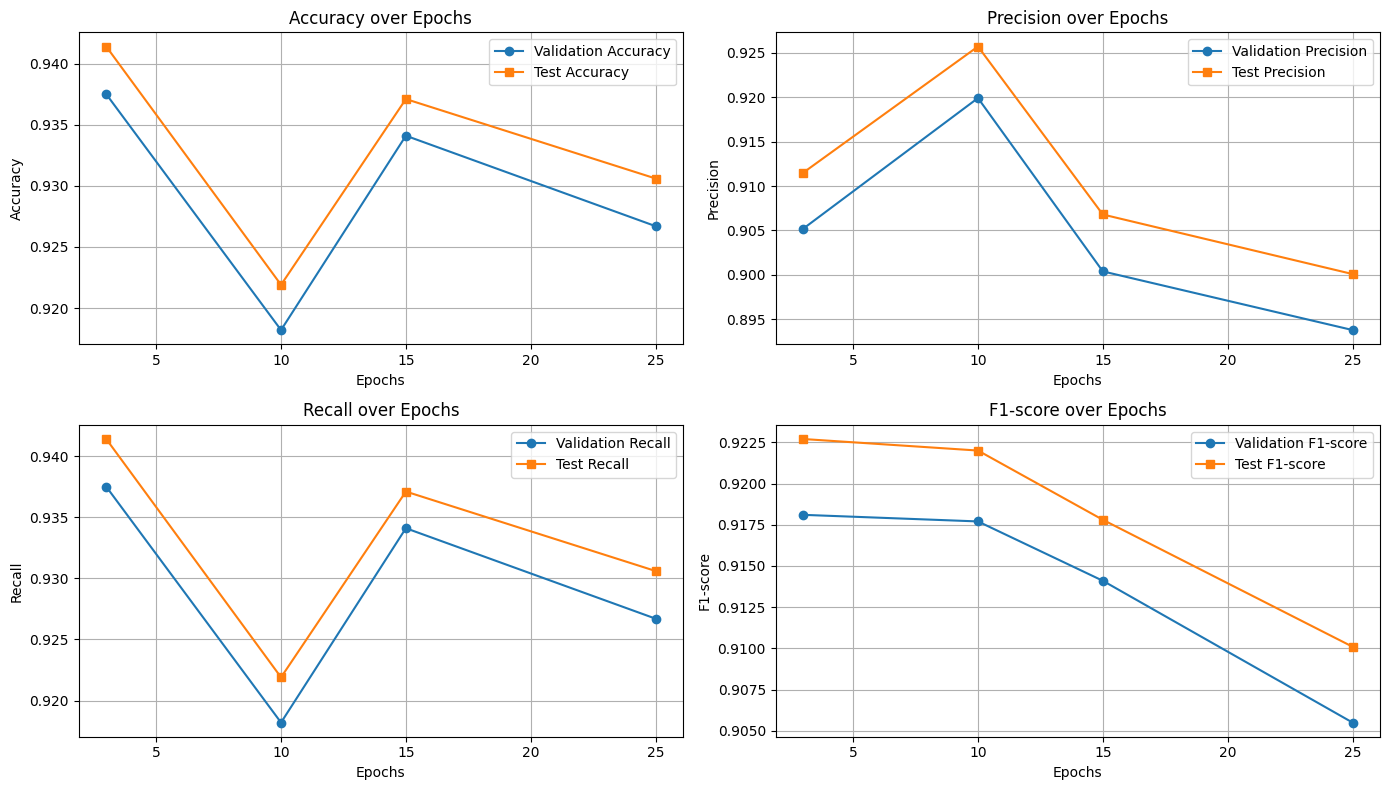

In [31]:
import matplotlib.pyplot as plt

# Epochs
epochs = [3,10, 15, 25]

# Validation metrics
val_accuracy = [0.9375,0.9182, 0.9341, 0.9267]
val_precision = [0.9052,0.9199, 0.9004, 0.8938]
val_recall = [0.9375,0.9182, 0.9341, 0.9267]
val_f1score = [0.9181,0.9177, 0.9141, 0.9055]

# Test metrics
test_accuracy = [0.9414,0.9219, 0.9371, 0.9306]
test_precision = [0.9115,0.9257, 0.9068, 0.9001]
test_recall = [0.9414,0.9219, 0.9371, 0.9306]
test_f1score = [0.9227,0.9220, 0.9178, 0.9101]

# Plotting the metrics
plt.figure(figsize=(14, 8))

# Accuracy
plt.subplot(2, 2, 1)
plt.plot(epochs, val_accuracy, 'o-', label='Validation Accuracy')
plt.plot(epochs, test_accuracy, 's-', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.grid(True)

# Precision
plt.subplot(2, 2, 2)
plt.plot(epochs, val_precision, 'o-', label='Validation Precision')
plt.plot(epochs, test_precision, 's-', label='Test Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Precision over Epochs')
plt.legend()
plt.grid(True)

# Recall
plt.subplot(2, 2, 3)
plt.plot(epochs, val_recall, 'o-', label='Validation Recall')
plt.plot(epochs, test_recall, 's-', label='Test Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Recall over Epochs')
plt.legend()
plt.grid(True)

# F1-score
plt.subplot(2, 2, 4)
plt.plot(epochs, val_f1score, 'o-', label='Validation F1-score')
plt.plot(epochs, test_f1score, 's-', label='Test F1-score')
plt.xlabel('Epochs')
plt.ylabel('F1-score')
plt.title('F1-score over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
